In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from numpy.random import seed
from numpy.random import randn
import seaborn as sns
from PyAstronomy import pyasl

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import ExtraTreesClassifier

sns.set_style('whitegrid')

%matplotlib inline

In [5]:
a=[1,2,3,4,5,6]

In [14]:
"""Confidence limits for the mean are an interval estimate for the mean.
Interval estimates are often desirable because the estimate of the mean 
varies from sample to sample. Instead of a single estimate for the mean,
a confidence interval generates a lower and upper limit for the mean.
The interval estimate gives an indication of how much uncertainty there 
is in our estimate of the true mean. The narrower the interval, the more precise is our estimate."""
computed_mean = np.mean(a)
print(f"The computed mean is {computed_mean}")

interval = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
print(f"The mean has a confidence limit of {interval}")

The computed mean is 3.5
The mean has a confidence limit of (1.5366856922723917, 5.463314307727608)


In [7]:
b = [2.2,2.21,2.22,2.23,2.24,2.25]

In [8]:
computed_mean = np.mean(b)
print(f"The computed mean is {computed_mean}")

interval = stats.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=stats.sem(b))
print(f"The mean has a confidence limit of {interval}")

The computed mean is 2.225
The mean has a confidence limit of (2.205366856922724, 2.244633143077276)


In [22]:
#A One Sample T-Test is a statistical test used to evaluate the null hypothesis that the mean m of a 1D sample dataset of independant observations is equal to the true mean μ of the population from which the data is sampled. In other words, our null hypothesis is that,
#m=μ
#For all of the tests, I will be using a significance level of 0.05. If the p value is below 0.05, we will be rejecting the null hypothesis.
data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(2, 1, size=50)

In [23]:
true_mu = 0
# Checking for data1
onesample_results = stats.ttest_1samp(data1, true_mu)

onesample_results
#Since our p-value is greater than our significance level, we have good evidence 
#to not reject the null-hypothesis. This is our expected result because the data
#was collected from a normal distribution.

Ttest_1sampResult(statistic=1.0170560744691217, pvalue=0.3141224388195702)

In [16]:
#The two-sample t-test is used to determine if two population means are equal
twosample_results = stats.ttest_ind(data1, data2)
twosample_results
#Since our p-value is much less than our significance level, then with great evidence 
#we can reject our null hypothesis of identical means. This is in alignment with our 
#setup, since we sampled from two different normal pdfs with different means.

Ttest_indResult(statistic=-10.847525369265375, pvalue=1.7690259983506895e-18)

In [17]:
#The one-way ANOVA tests the null hypothesis that two or more groups 
#have the same population mean. The test is applied to samples from
#two or more groups, possibly with differing sizes
x1 = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
x2 = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
x3 = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
x4 = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
x5 = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [20]:
print(np.mean(x1))
print(np.mean(x2))
print(np.mean(x3))
print(np.mean(x4))
print(np.mean(x5))

0.0802
0.07479999999999999
0.10344285714285714
0.0780125
0.09570000000000001


In [21]:
stats.f_oneway(x1, x2, x3, x4, x5)
#Since our p-value is much less than the significance level of 0.05, 
#then with great evidence we can reject our null hypothesis of identical means.

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [24]:
#Bartlett’s test tests the null hypothesis that all input samples 
#are from populations with equal variances. For samples from 
#significantly non-normal populations, Levene’s test is more robust.
x1 = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
x2 = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
x3 = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
x4 = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
x5 = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]


In [25]:
stats.bartlett(x1, x2, x3, x4, x5)

BartlettResult(statistic=2.434137301964408, pvalue=0.6564670643021056)

In [26]:
#The Levene test also tests the null hypothesis that all input samples are
#from populations with equal variances. Levene’s test is an alternative
#to Bartlett’s test bartlett in the case where there are significant deviations from normality.
stats.levene(x1, x2, x3, x4, x5)

LeveneResult(statistic=0.1199559192932723, pvalue=0.9744415772405349)

In [29]:
#For unimodal continuous distributions, a skewness value > 0 means
#that there is more weight in the right tail of the distribution and < 0
#means that there is more weight in the left tail of the distribution.
# Dummy data
x = np.random.normal(0, 2, 10000)   # create random values based on a normal distribution
print(x)

[-3.05125399  0.26970034 -0.51575059 ... -0.07572471 -0.35960291
 -0.0550033 ]


Text(0.5,1,'Gaussian Distribution')

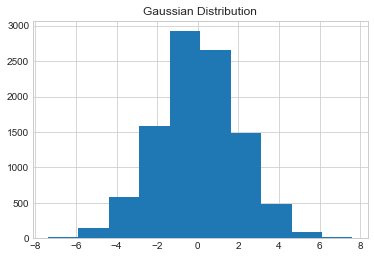

In [30]:
# The histogram plot
pd.Series(x).hist()
plt.title('Gaussian Distribution')

In [31]:
print( 'Excess kurtosis of normal distribution (should be 0): {}'.format( stats.kurtosis(x) ))
print( 'Skewness of normal distribution (should be 0): {}'.format( stats.skew(x) ))

Excess kurtosis of normal distribution (should be 0): 0.0821165720050483
Skewness of normal distribution (should be 0): -0.00617649999650896


In [32]:
# Dummy data
weibull_x = np.random.weibull(10., 10000)   # create random values based on a weibull distribution.

Text(0.5,1,'Weibull Distribution')

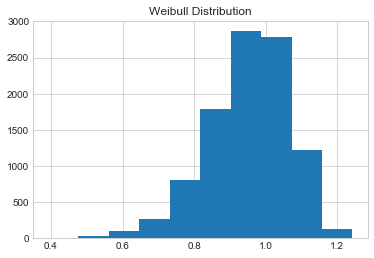

In [33]:
# The histogram plot
pd.Series(weibull_x).hist()
plt.title('Weibull Distribution')

In [34]:
print( 'Excess kurtosis of weibull distribution: {}'.format( stats.kurtosis(weibull_x) ))
print( 'Skewness of weibull distribution: {}'.format( stats.skew(weibull_x) ))

Excess kurtosis of weibull distribution: 0.6571919790103005
Skewness of weibull distribution: -0.6666997949148127


In [35]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=50.303 stdv=4.426


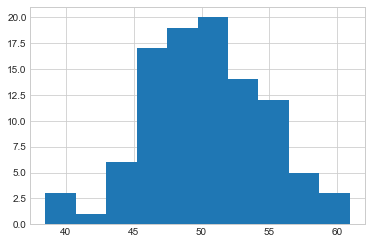

In [36]:
plt.hist(data);

In [37]:
from statsmodels.graphics.gofplots import qqplot

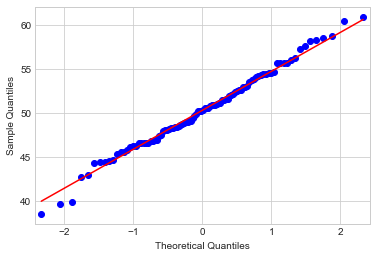

In [40]:
qqplot(data, line='s');

In [41]:
#The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is
#that the data was drawn from a Gaussian distribution.

stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [42]:
#Skew is a quantification of how much a distribution is pushed left or right
#, a measure of asymmetry in the distribution. Kurtosis quantifies how much
#of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
stat, p = stats.normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [43]:
#Anderson-Darling Test (Theodore Anderson and Donald Darling) is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples.

#It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

#A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

#The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

#We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.
result = stats.anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


In [44]:
#The chi-squared goodness of fit test or Pearson’s chi-squared test is used to assess whether a set of data is consistent with proposed values for the parameters.

#Null hypothesis : Assume the observed values are similar as the expected values.
observed_values=np.array([18,21,16,7,15])
expected_values=np.array([22,19,44,8,16])

stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=18.94348086124402, pvalue=0.0008062955548480186)

In [46]:
#Kolmogorov-Smirnov Test
#This tests whether 2 samples are drawn from the same distribution.

#Null Hypothesis : Assume the samples are from the same distribution.
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)


Ks_2sampResult(statistic=0.20833333333333337, pvalue=4.667497551580699e-05)

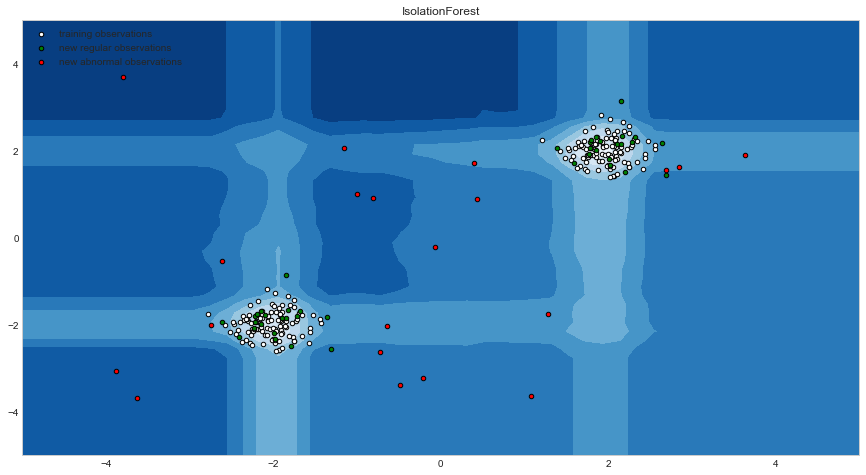

In [47]:
#outlier detection
#isolated random forest
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100,random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,8))

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left");

In [48]:
#Grubbs' test is used to detect a single outlier in a univariate data set that follows an approximately normal distribution.

#If you suspect more than one outlier may be present, it is recommended that you use either the
#Tietjen-Moore test or the generalized extreme studentized deviate test instead of the Grubbs' test.
from scipy.stats import t, zscore

def grubbs(X, test='two-tailed', alpha=0.05):

    '''
    Performs Grubbs' test for outliers recursively until the null hypothesis is
    true.

    Parameters
    ----------
    X : ndarray
        A numpy array to be tested for outliers.
    test : str
        Describes the types of outliers to look for. Can be 'min' (look for
        small outliers), 'max' (look for large outliers), or 'two-tailed' (look
        for both).
    alpha : float
        The significance level.

    Returns
    -------
    X : ndarray
        The original array with outliers removed.
    outliers : ndarray
        An array of outliers.
    '''
    print("Original data:",X)
    Z = zscore(X, ddof=1)  # Z-score
    N = len(X)  # number of samples

    # calculate extreme index and the critical t value based on the test
    if test == 'two-tailed':
        extreme_ix = lambda Z: np.abs(Z).argmax()
        t_crit = lambda N: t.isf(alpha / (2.*N), N-2)
    elif test == 'max':
        extreme_ix = lambda Z: Z.argmax()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    elif test == 'min':
        extreme_ix = lambda Z: Z.argmin()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    else:
        raise ValueError("Test must be 'min', 'max', or 'two-tailed'")

    # compute the threshold
    thresh = lambda N: (N - 1.) / np.sqrt(N) * \
        np.sqrt(t_crit(N)**2 / (N - 2 + t_crit(N)**2))

    # create array to store outliers
    outliers = np.array([])

    # loop throught the array and remove any outliers
    while abs(Z[extreme_ix(Z)]) > thresh(N):

        # update the outliers
        outliers = np.r_[outliers, X[extreme_ix(Z)]]
        # remove outlier from array
        X = np.delete(X, extreme_ix(Z))
        # repeat Z score
        Z = zscore(X, ddof=1)
        N = len(X)
    print("Cleaned Data",X ,"Outlier:",outliers)
    print("---")
    return X, outliers



# setup some test arrays
X = np.arange(-5, 6)
X1 = np.r_[X, 100]
X2 = np.r_[X, -100]

# test the two-tailed case
Y, out = grubbs(X1)
assert out == 100
Y, out = grubbs(X2)
assert out == -100

# test the max case
Y, out = grubbs(X1, test='max')
assert out == 100
Y, out = grubbs(X2, test='max')
assert len(out) == 0

# test the min case
Y, out = grubbs(X1, test='min')
assert len(out) == 0
Y, out = grubbs(X2, test='min')
assert out == -100

Original data: [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [100.]
---
Original data: [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [-100.]
---
Original data: [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [100.]
---
Original data: [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100]
Cleaned Data [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100] Outlier: []
---
Original data: [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100]
Cleaned Data [ -5  -4  -3  -2  -1   0   1   2   3   4   5 100] Outlier: []
---
Original data: [  -5   -4   -3   -2   -1    0    1    2    3    4    5 -100]
Cleaned Data [-5 -4 -3 -2 -1  0  1  2  3  4  5] Outlier: [-100.]
---


In [49]:
from sklearn.datasets import load_boston

In [50]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


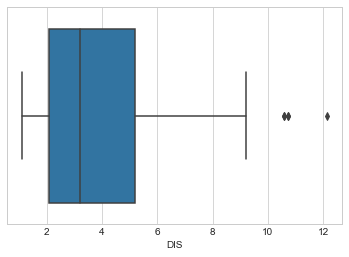

In [51]:
sns.boxplot(x=boston_df['DIS'])

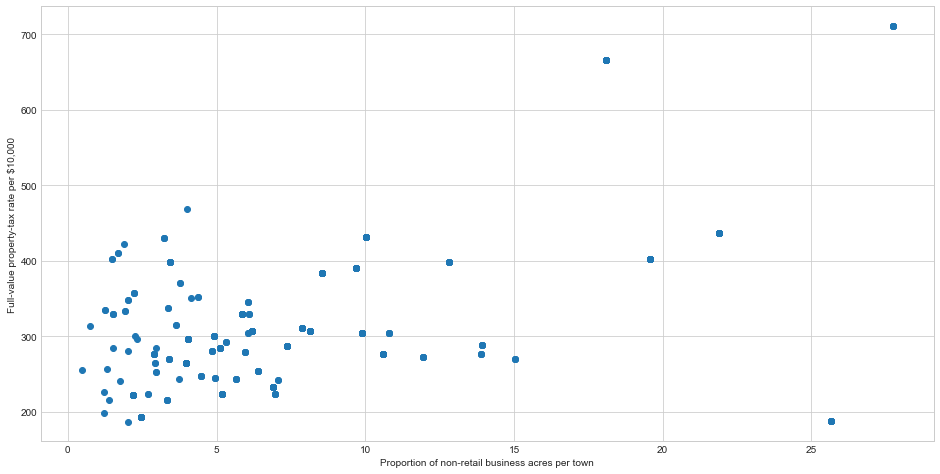

In [52]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [53]:
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41771335 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41526932 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41527165 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41137448 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40568883 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41292893 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [54]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [55]:
print(z[55][1])

3.375038763517309


In [56]:
z_filtered_df= boston_df[(z < 3).all(axis=1)]
z_filtered_df.shape

(415, 13)

In [57]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.565378
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [58]:
filtered_df =boston_df[~((boston_df < (Q1 - 1.5 * IQR))|(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
filtered_df.shape

(274, 13)

In [60]:
#Box plot uses the IQR method to display data and outliers(shape of the data) 
#but in order to be get a list of identified outlier, we will need to use the 
#mathematical formula and retrieve the outlier data.
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.565378
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [61]:
filtered_df =boston_df[~((boston_df < (Q1 - 1.5 * IQR))|(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
#The generalized ESD (Extreme Studentized Deviate) test is used to detect one or more 
#outliers in a univariate data set that follows an approximately normal distribution.
x = np.array([float(x) for x in "-0.25 0.68 0.94 1.15 1.20 1.26 1.26 1.34 1.38 1.43 1.49 1.49 \
          1.55 1.56 1.58 1.65 1.69 1.70 1.76 1.77 1.81 1.91 1.94 1.96 \
          1.99 2.06 2.09 2.10 2.14 2.15 2.23 2.24 2.26 2.35 2.37 2.40 \
          2.47 2.54 2.62 2.64 2.90 2.92 2.92 2.93 3.21 3.26 3.30 3.59 \
          3.68 4.30 4.64 5.34 5.42 6.01".split()])


In [63]:
# Apply the generalized ESD
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

Number of outliers:  3
Indices of outliers:  [53, 52, 51]
        R      Lambda
 1   3.14819   3.15879
 2   2.97114   3.15143
 3   3.21044   3.14389
 4   2.83814   3.13616
 5   2.84416   3.12825
 6   2.87769   3.12013
 7   2.30345   3.11180
 8   2.33534   3.10324
 9   2.12480   3.09446
10   2.09054   3.08542


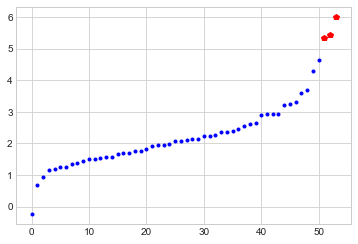

In [64]:
print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
    print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.plot(x, 'b.')
# and mark the outliers.
for i in range(r[0]):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

Number of outliers detected:  2
Indices of these outliers:  [27, 43]


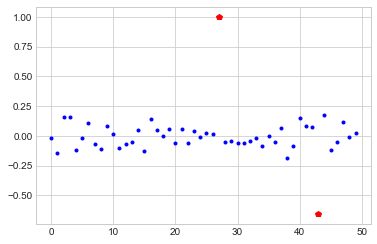

In [65]:
#Distance-based outlier detection
# Get some data
#The generalized ESD test requires approximate normal distribution for the data points, 
#which—for example in the case of a spectrum—can be a harsh limitation.
x = np.random.normal(0.,0.1,50)

# Introduce outliers
x[27] = 1.0
x[43] = -0.66

# Run distance based outlier detection
r = pyasl.pointDistGESD(x, 5)

print("Number of outliers detected: ", r[0])
print("Indices of these outliers: ", r[1])

plt.plot(x, 'b.')
for i in range(len(r[1])):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

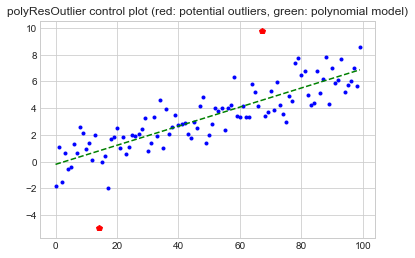

Number of outliers:  2
Indices of outliers:  [14 67]


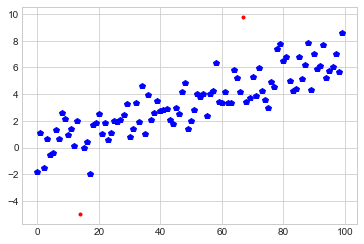

In [66]:
#Outlier detection based on polynomial fit
# Generate some "data"
x = np.arange(100)
y = np.random.normal(x*0.067, 1.0, len(x))

# Introduce an outliers
y[14] = -5.0
y[67] = +9.8

# Find outliers based on a linear (deg = 1) fit.
# Assign outlier status to all points deviating by
# more than 3.0 standard deviations from the fit,
# and show a control plot.
iin, iout = pyasl.polyResOutlier(x, y, deg=1, stdlim=3.0, controlPlot=True)

# What about the outliers
print("Number of outliers: ", len(iout))
print("Indices of outliers: ", iout)

# Remove outliers
xnew, ynew = x[iin], y[iin]

# Plot result (outlier in red)
plt.plot(x, y, 'r.')
plt.plot(xnew, ynew, 'bp');

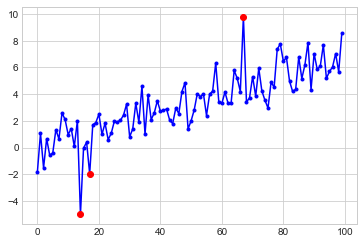

Number of outliers:  3
Indices of outliers:  [14 17 67]


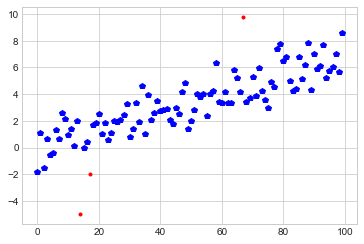

In [67]:
iin, iout = pyasl.slidingPolyResOutlier(x, y, 20, deg=1, stdlim=3.0, controlPlot=True)

# What about the outliers
print("Number of outliers: ", len(iout))
print("Indices of outliers: ", iout)

# Remove outliers
xnew, ynew = x[iin], y[iin]

# Plot result (outlier in red)
plt.plot(x, y, 'r.')
plt.plot(xnew, ynew, 'bp')